# Mathematisches Pendel
[P. Kersten](https://www.hshl.de/personen/prof-dr-ing-peter-kersten), J. Jeschonowski, L.P. Kamegne-Kamdem, N.B. Neathery und D.M. Weis

[Hochschule Hamm-Lippstadt](https://www.hshl.de), Marker Allee 76–78, D-59063 Hamm

## Inhalt
- Experimentelle Bestimmung der Schwingungsdauer $T$
- Mit der Dimensionsanalyse und dem Experiment eine Formel für die Schwingungsdauer $T$ entwickeln
- Den Wert für die Erdbeschleunigung $g$ experimentell ermitteln

In [1]:
%matplotlib inline
import numpy as np
import sympy as sp
import math as m
import matplotlib.pyplot as plt
import ipywidgets as widgets
import scipy.optimize

from ipywidgets import interact
from sympy import symbols
from sympy.plotting import plot3d
from matplotlib.pyplot import figure

from scipy.optimize import curve_fit

## Experimentelle Bestimmung der Schwingungsdauer $T$

Wir wollen die Schwingungsdauer $T$ eines mathematischen Pendels experimentell ermitteln. Gemäß der durchgeführten Dimensionsanalyse erwarten wir folgenden Zusammenhang:


$T\sim \sqrt{\frac{l}{g}}$

Hierbei sind $l$ die Fadenlänge und $g$ die Erdbeschleunigung. Diesen Zusammenhang wollen wir experimentell mit einfachen Mitteln (ein kleines Gewicht, ein Zwirnsfaden, ein Maßband und eine Stoppuhr reichen aus) folgendermaßen überprüfen:

- Wir messen die Schwingungsdauer $T$ für die Fadenlängen 0,50 m, 0,75 m, 1,00 m, 1,25 m und 1,5 m.

- Um eine höhere Genauigkeit bei der Zeitmessung zu erzielen, messen wir 10 volle Schwingungen (also jeweil hin- und zurück).

- Schreiben Sie die Meßwerte für die Fadenlänge (in der Einheit m) in den Vektor (variable `l`). 

- Schreiben Sie die Meßwerte für die Schwingungsdauer $T_{10}$ (in der Einheit s) in den Vektor (variable `T10`).

In [2]:
l = np.array([0.5, 0.75, 1.0, 1.25, 1.5]) # Messwerte der Fadenlänge
T10 = np.array([13.8, 17.0, 19.6, 21.6, 22.0]) # Messwerte der Schwingunszeiten für 10 volle Schwingungen

T = T10/10

Nun können wir die Meßwerte grafisch darstellen.

Text(0.5, 1.0, 'Das mathematische Pendel')

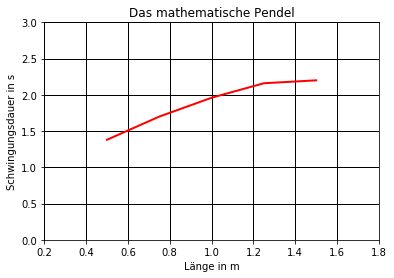

In [3]:
plt.plot(l,T,'r',lw=2)
plt.grid(color='k', linestyle='-', linewidth=1)
plt.ylim(0, 3)
plt.xlim(0.2, 1.8)
plt.xlabel('Länge in m')
plt.ylabel('Schwingungsdauer in s')
plt.title('Das mathematische Pendel')


## Mit der Dimensionsanalyse und dem Experiment eine Formel für die Schwingungsdauer $T$ entwickeln

Wenn der vermutete Zusammenhang $T\sim \sqrt{\frac{l}{g}}$ richtig ist, erwarten wir eine Funktionsverlauf der Form $T= \alpha \cdot l^{\beta}$.

Die Parameter $\alpha$ und $\beta$ können wir mit Hilfe einer Regressionsanalyse bestimmen.

In [4]:
def fit(x,a,b):
    return a * x**b

params, covariance = curve_fit(f = fit, xdata = l, ydata = T)

print('alpha:', params[0])
print('beta', params[1])

alpha: 1.9121234346738467
beta 0.4253363181803931


## Den Wert für die Erdbeschleunigung $g$ experimentell ermitteln

In Lehrbüchern finden wir folgende Formel für die Schwingungsdauer $T$ eines mathematischen Pendels:

$T = 2 \pi \sqrt{\frac{l}{g}}$

Diese Formel ermöglicht uns, die Erdbeschleunigung $g$ mit Hilfe einer Regressionsanalyse aus unseren Messwerten zu ermitteln.

Hierzu formen wir den Ausdruck für $T$ folgendermaßen um:   
$T = 2 \pi \cdot ({\frac{1}{g}})^{0,5} \cdot (l)^{0,5}$

Mit der Regression wird nun berechent, welcher optimaler Wert für $g$ resultiert, wenn sich die Meßwerte optimal an die exakte Formel anpassen sollen.

In [5]:
def fit1(x,g):
    return 2*m.pi*x**0.5 * (1/g)**0.5

params, covariance = curve_fit(f = fit1, xdata = l, ydata = T)
print('g:', params[0])

g: 10.895802090267464
